# SALIFORT PROJECT 

# REGRESSION ANALYSIS

### Understanding and analysing data 



In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [5]:
#Importing packages

import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [6]:
df = pd.read_csv("HR_capstone_dataset.csv")

In [7]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [8]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
# Renaming columns
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Bayes Theorem for Duplicates

In [13]:
# Identifying duplicates in the data (rows that have exactly the same values across all columns)
duplicates = df[df.duplicated()]

# Initializing a dictionary to store the probability of matching for each column
column_probabilities = {}

# Calculating the probability of matching values in each column (the likelihood of the same value)
for column in df.columns:
    # Calculating how often each value appears in the column
    value_counts = df[column].value_counts(normalize=True)
    
    # Assuming that the value that appears most often is the most probable for duplication
    # If a value appears very rarely, it's less likely that two rows will have the same value
    column_probabilities[column] = value_counts.max()

# Calculating the overall probability of a duplicate across all columns

probability_duplicate = np.prod(list(column_probabilities.values()))

# Printing the probabilities
print(f"Probability of a row being a duplicate (based on identical responses): {probability_duplicate}")

Probability of a row being a duplicate (based on identical responses): 6.238839222637789e-08


In [14]:
# Dropping duplicates
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Outliers

In [16]:
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours        tenure  work_accident          left  \
count           11991.000000  11991.000000   11991.000000  11991.000000   
mean              200.473522      3.364857       0.154282      0.166041   
std                48.727813      1.330240       0.361234      0.372133   
min                96.000000      2.000000       0.000000      0.000000   
25%               157.000000      3.000000       0.000000      0.000000   
50%               200.000000      3.000000       0.000000      0.000000   
75%               243.000000      4.000000       0.000000      0.000000   
max               310.000000     10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

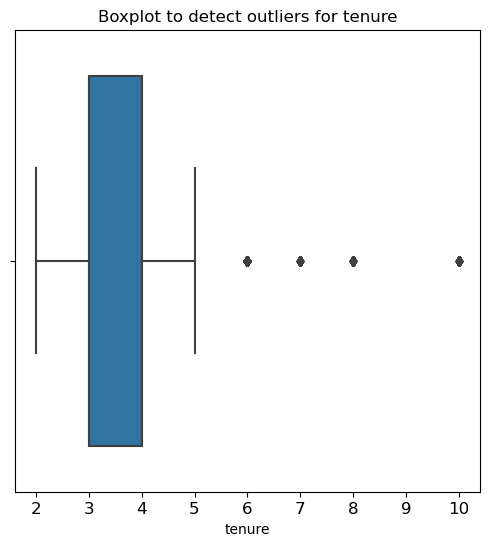

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [18]:
# Compute the 25th percentile value in `tenure`
q1 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
q3 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = q3 - q1

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


### Data Visualization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly hours by number of projects')

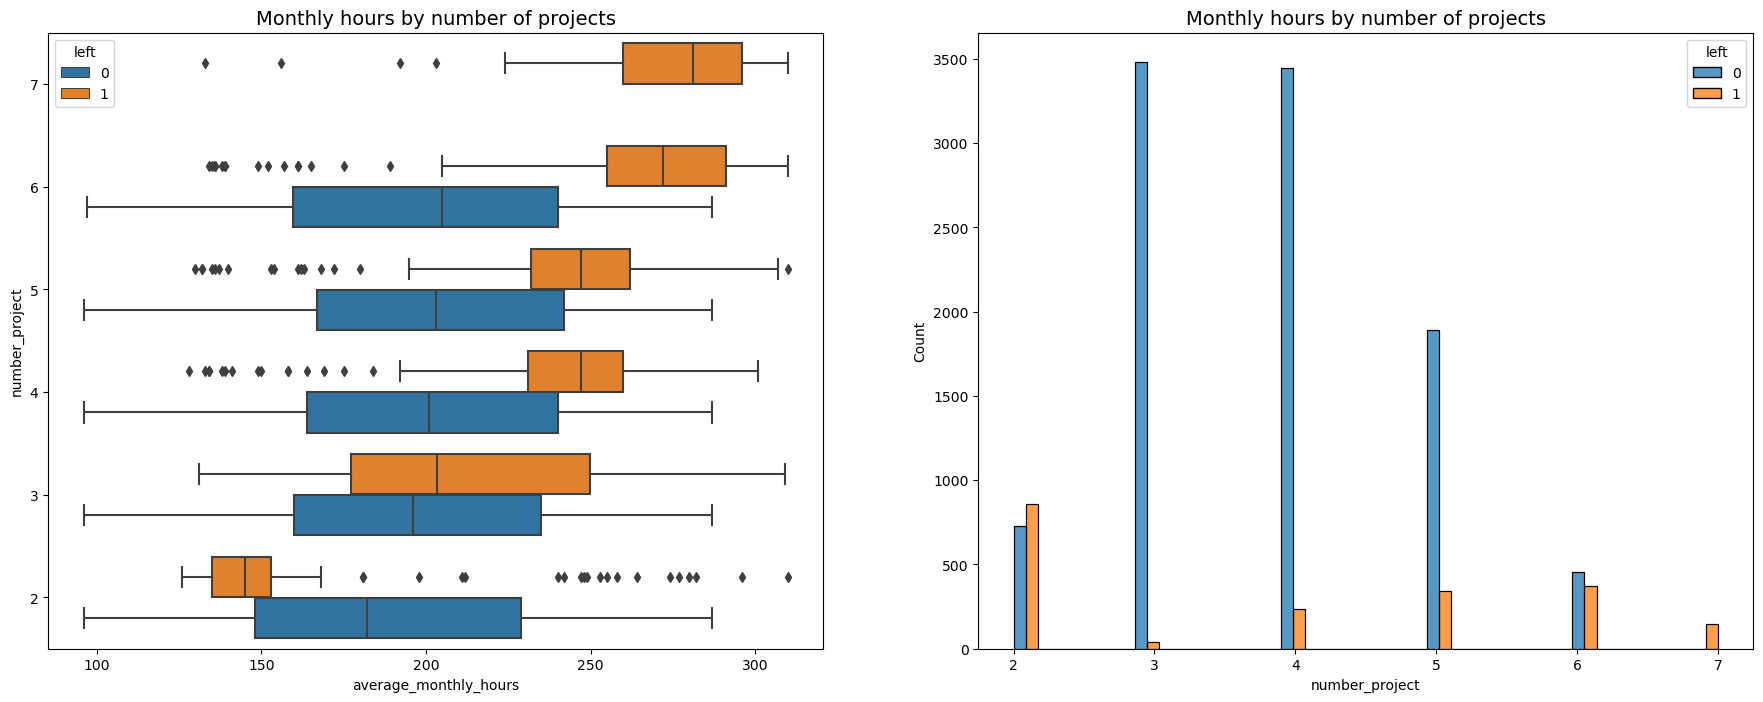

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1,x='average_monthly_hours',y='number_project',hue='left',orient="h",ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

sns.histplot(data=df1,x='number_project',multiple='dodge',hue='left',ax=ax[1])
ax[1].set_title('Monthly hours by number of projects', fontsize='14')

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

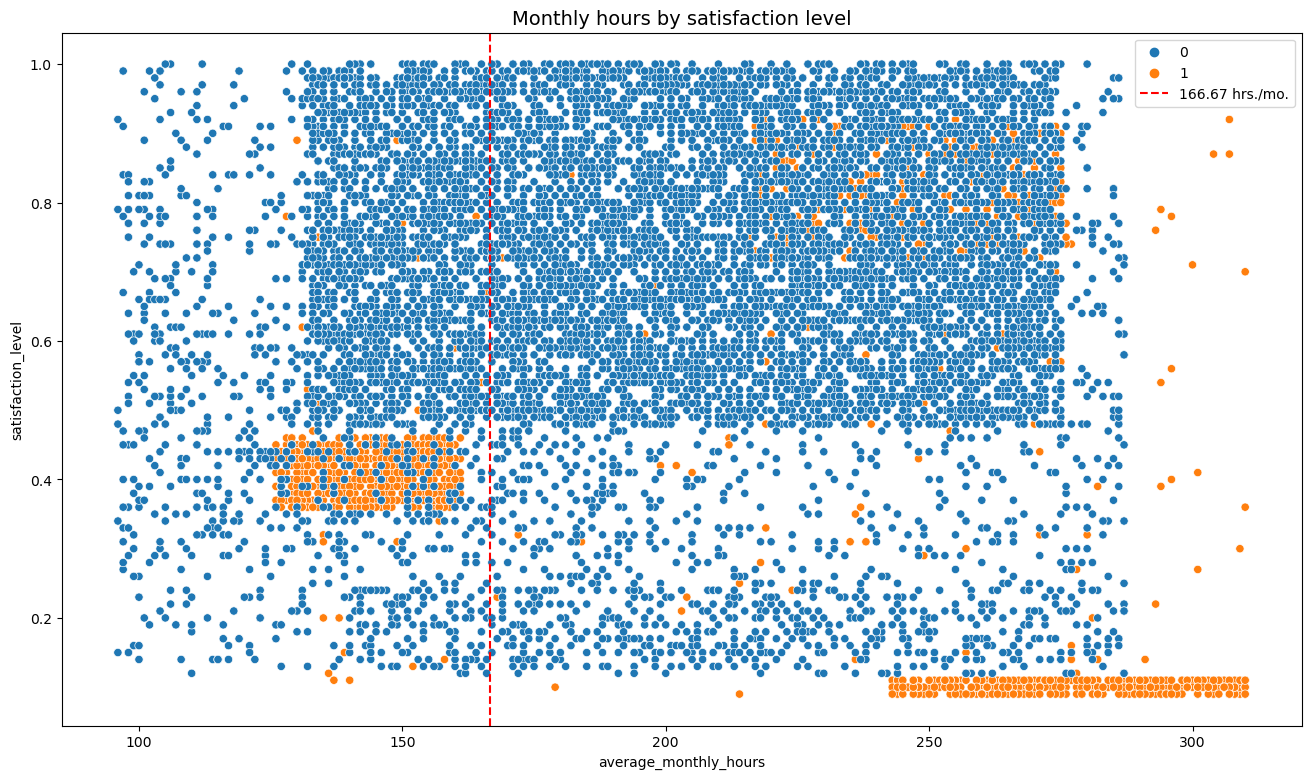

In [22]:
# Average monthly hours vs satisfaction level
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left')
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.title('Monthly hours by satisfaction level', fontsize='14')
plt.legend()

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


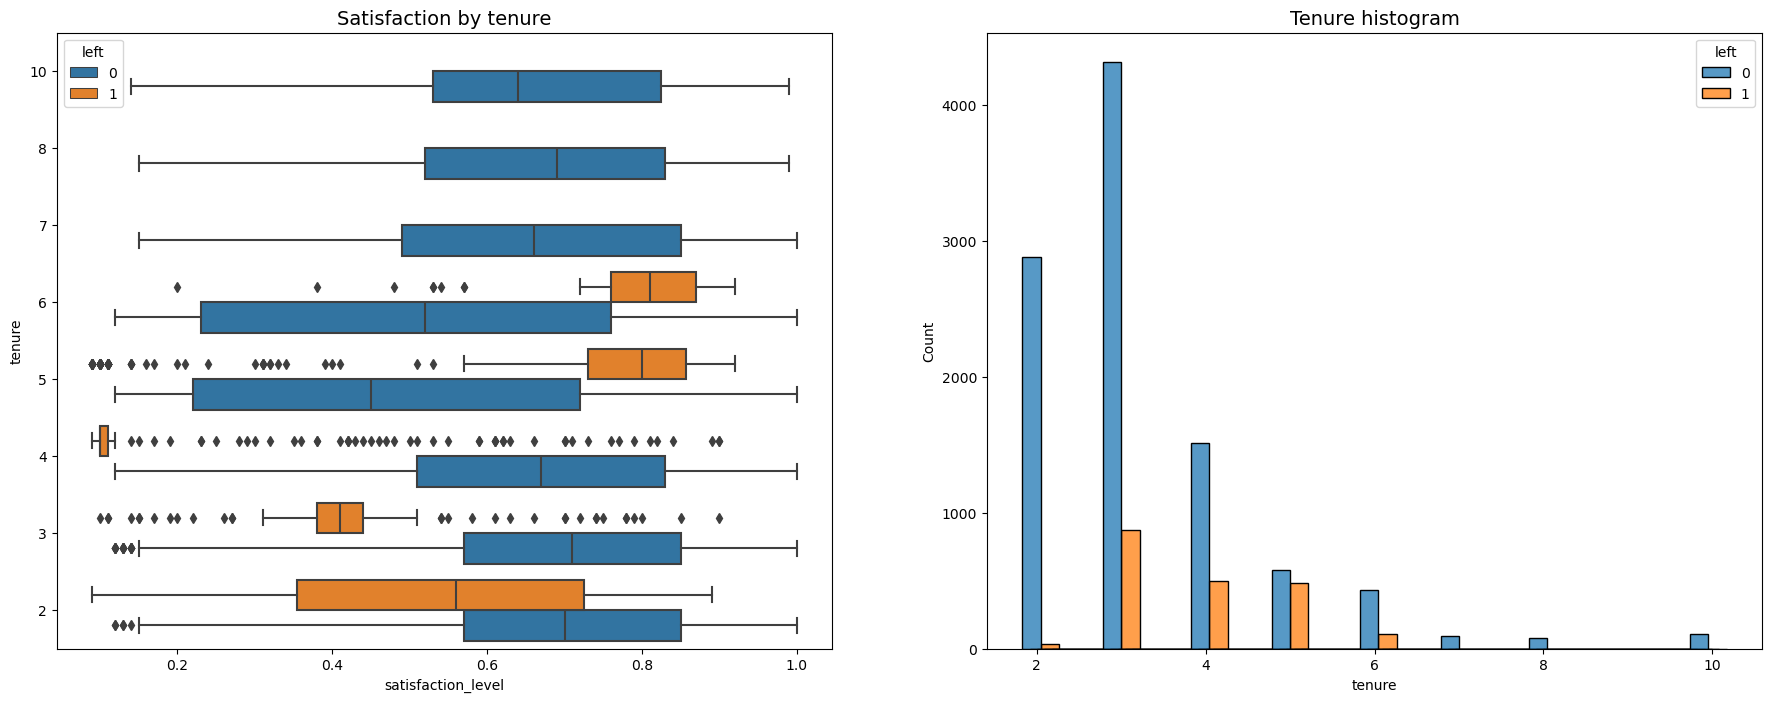

In [24]:
# Satisfaction level vs Tenure
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `satisfaction level` distributions by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left',multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

# Display the plots
plt.show()

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [26]:
#calculating the mean and median satisfaction scores of employees who left and stayed
df.groupby('left')['satisfaction_level'].agg(['mean','median'])

mean  median
left                  
0     0.666810    0.69
1     0.440098    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Salary Distribution:Long Tenured')

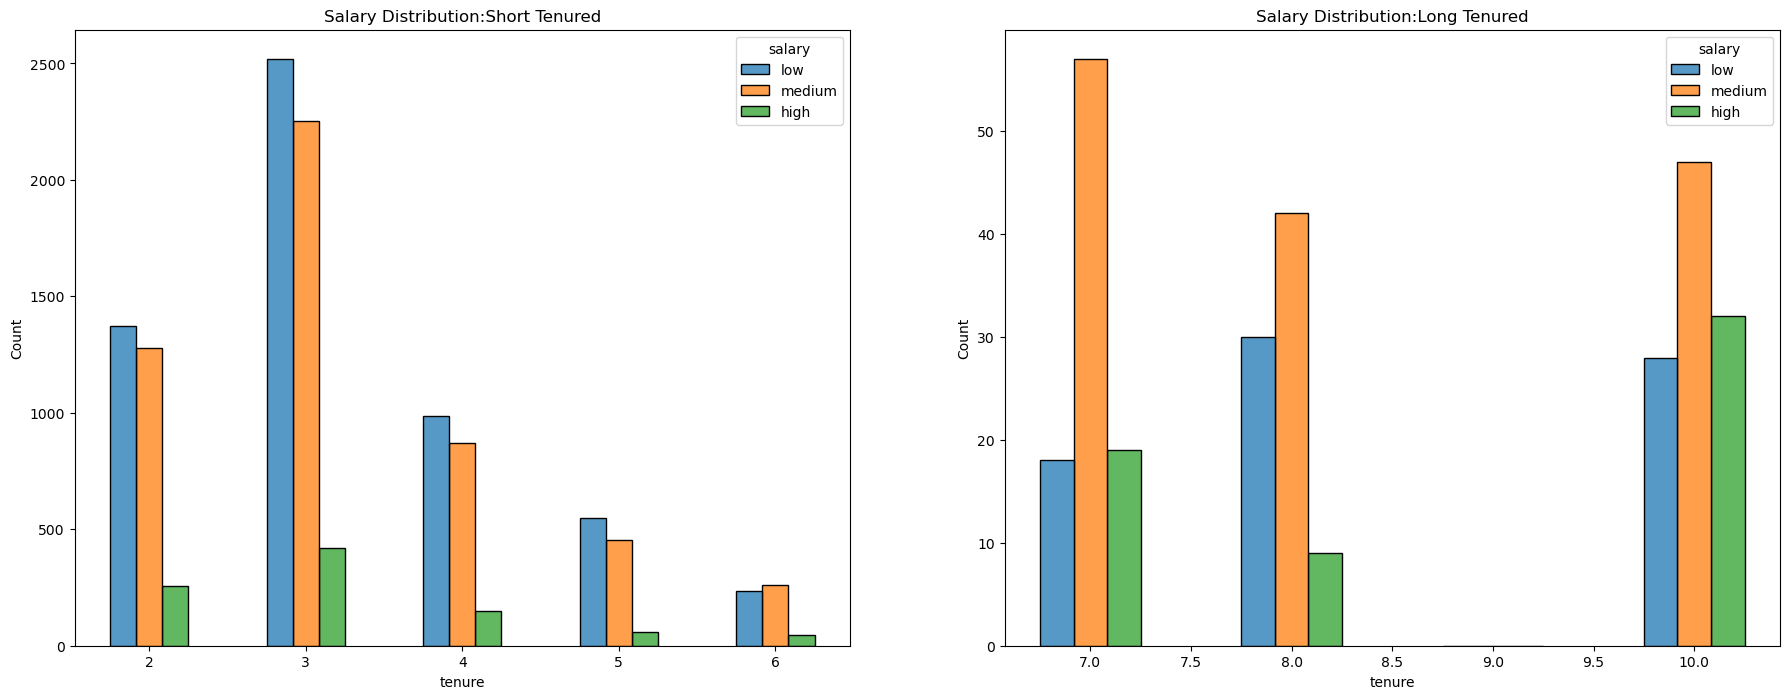

In [28]:
#salary levels for different tenures
fig, ax = plt.subplots(1, 2, figsize = (22,8))

short_tenure = df1[df1['tenure']<7]
long_tenure = df1[df1['tenure']>6]

sns.histplot(data=short_tenure,x='tenure',hue='salary',hue_order=['low', 'medium', 'high'],\
             multiple='dodge',ax=ax[0],shrink=0.5,discrete=1)
ax[0].set_title('Salary Distribution:Short Tenured')

sns.histplot(data=long_tenure,x='tenure',hue='salary',hue_order=['low', 'medium', 'high'],\
             multiple='dodge',ax=ax[1],shrink=0.5,discrete=1)
ax[1].set_title('Salary Distribution:Long Tenured')

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

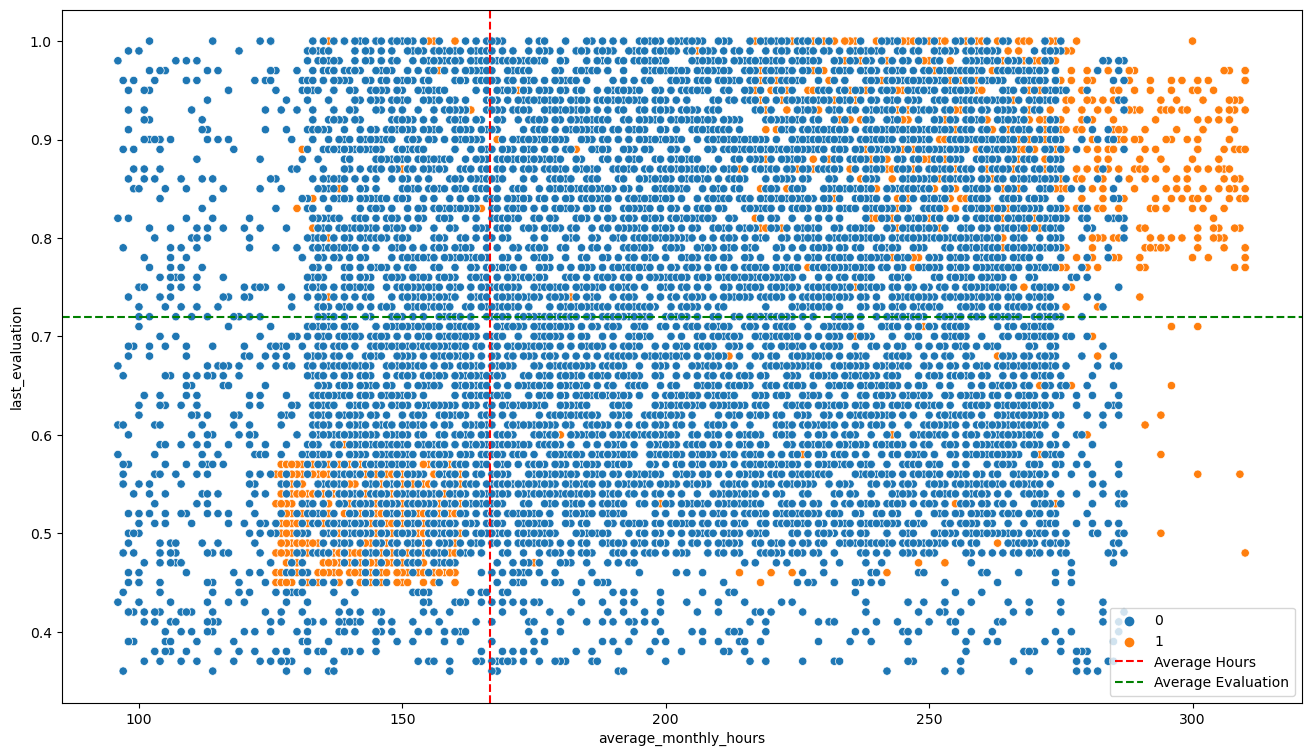

In [30]:
# monthly_hours vs evaluation_score

plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='last_evaluation',hue='left')
plt.axvline(x=166.67, color='red', linestyle='--', label='Average Hours')
plt.axhline(y=round(df1['last_evaluation'].mean(),2), color='green', linestyle='--', label='Average Evaluation')
plt.legend()

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

In [32]:
df1

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  department  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  
11999                      0          IT     low  

[11991 rows x 10 columns]

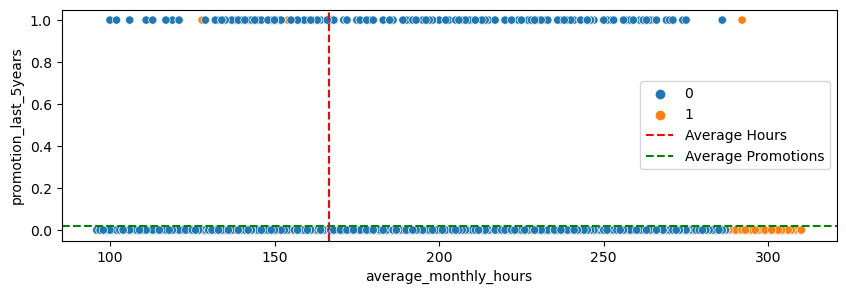

In [33]:
#long hours vs promotion in the last five years
plt.figure(figsize=(10,3))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left')
plt.axvline(x=166.67, color='red', linestyle='--', label='Average Hours')
plt.axhline(y=round(df1['promotion_last_5years'].mean(),2), color='green', linestyle='--', label='Average Promotions')
plt.legend()

- Very few employees who were promoted in the last five years left
- Very few employees who worked the most hours were promoted
- All of the employees who left were working the longest hours

In [35]:
# Left vs departments
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


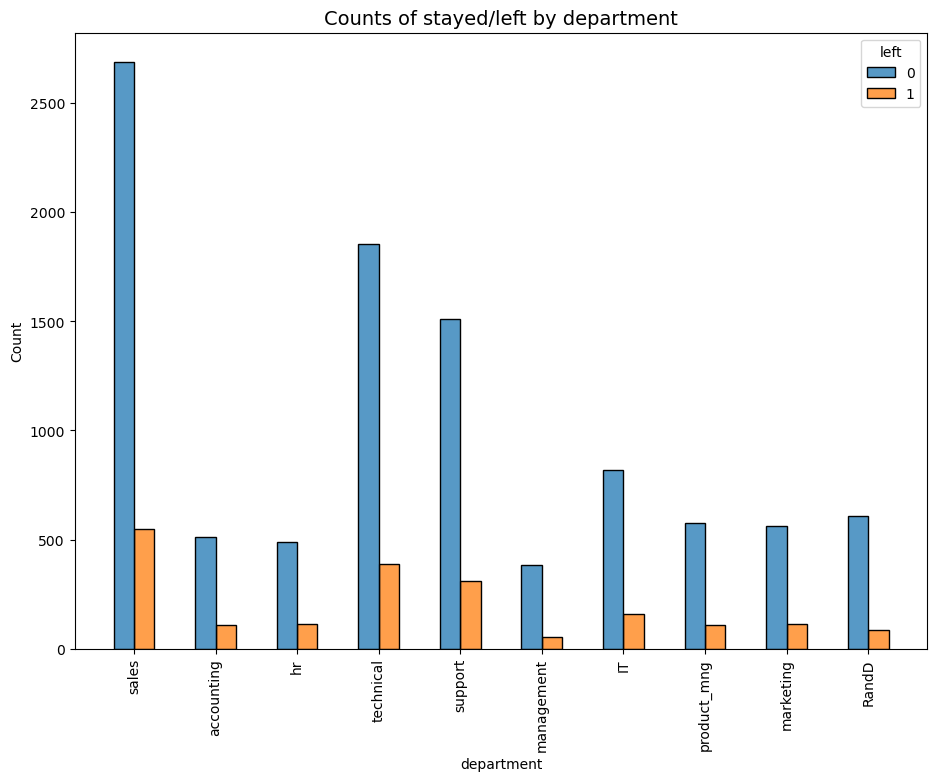

In [36]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

In [38]:
df1.corr(numeric_only=True)

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
tenure                          -0.152915         0.096829        0.188837   
work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   

                       average_monthly_hours    tenure  work_accident  \
satisfaction_level                 -0.006252 -0.152915       0.039940   
last_evaluation                     0.264678  0.096829      -0.005695   
number_project                      0.331516  0.188837      -0.005612   
average_monthly_hours               1.000000  0.102875      -0.012860   
tenure                              0.102875  1.000000       0.000003   
work_accident                      -0.012860  0.000003       1.000000   
left                                0.070409  0.173295      -0.125436   
promotion_last_5years              -0.004964  0.056828       0.029852   

                           left  promotion_last_5years  
satisfaction_level    -0.350558               0.019789  
last_evaluation        0.013520              -0.007206  
number_project         0.030928              -0.000544  
average_monthly_hours  0.070409              -0.004964  
tenure                 0.173295               0.056828  
work_accident         -0.125436               0.029852  
left                   1.000000              -0.044657  
promotion_last_5years -0.044657               1.000000

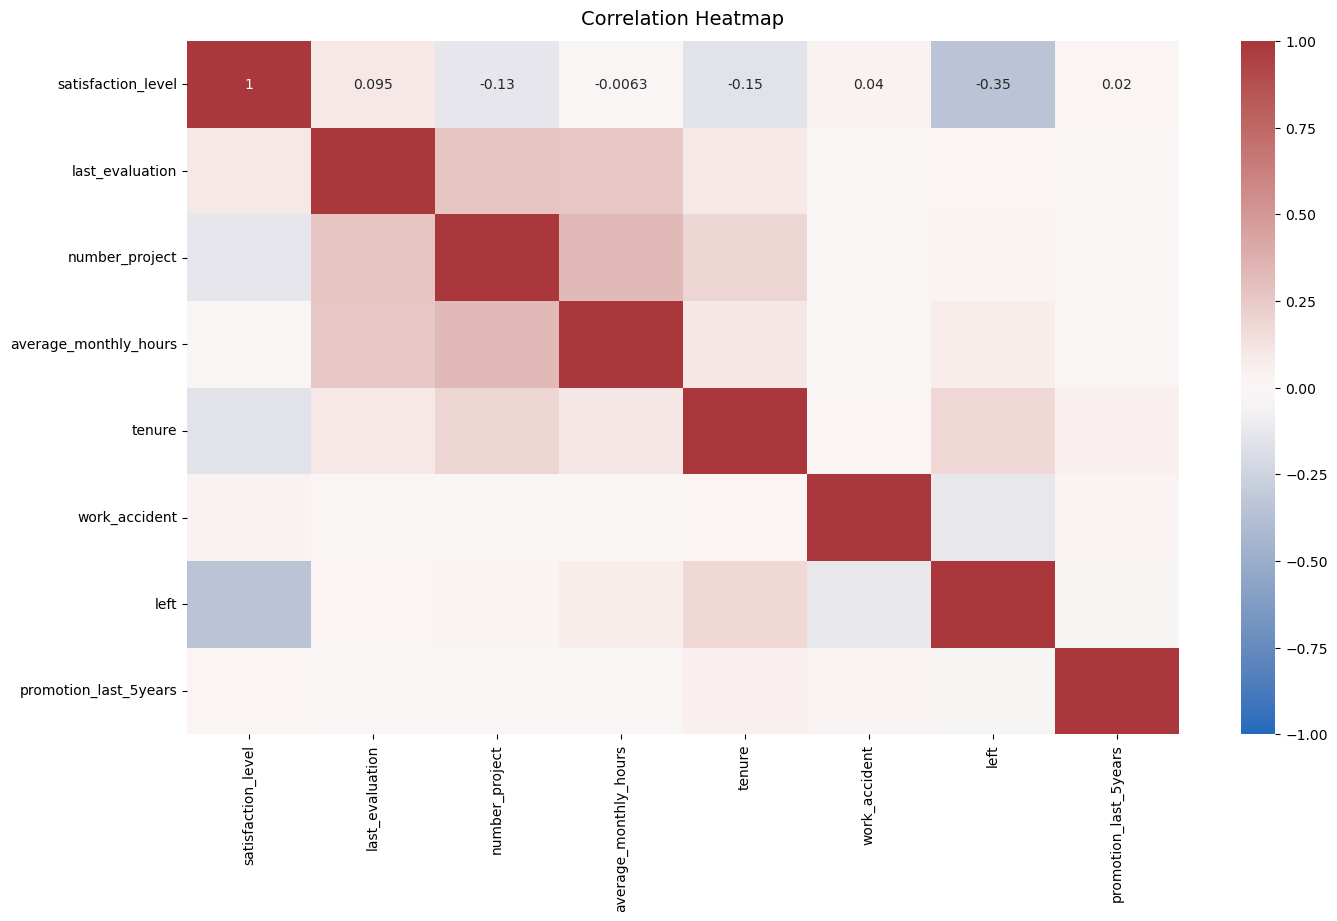

In [39]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

**Data Analysis Conclusion:-**
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# LOGISTIC REGRESSION MODEL

In [43]:
# Copy the DataFrame
df_enc = df1.copy()

# Encode the 'salary' column as ordinal (low < medium < high)
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_enc['salary'] = df_enc['salary'].map(salary_map)

# One-hot encode the 'department' column
df_enc = pd.get_dummies(df_enc, columns=['department'], drop_first=False)

# Display the new DataFrame
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [44]:
#Checking Class balance
df_enc['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

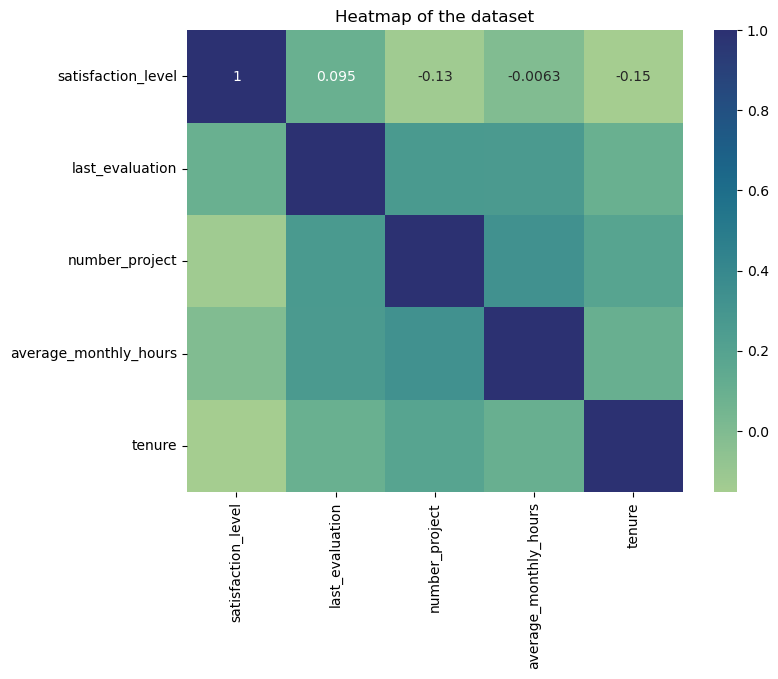

In [45]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [46]:
y=df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [47]:
X=df_enc.drop('left',axis=1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [49]:
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [50]:
y_pred=log_clf.predict(X_test)

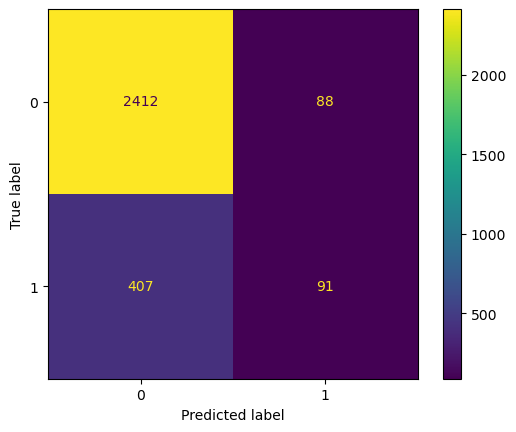

In [51]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [52]:
target_names=['predicted would not leave','predicted would leave']
print(classification_report(y_test,y_pred,target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.96      0.91      2500
    predicted would leave       0.51      0.18      0.27       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.57      0.59      2998
             weighted avg       0.80      0.83      0.80      2998



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%.

# TREE-BASED MODEL ANALYSIS

In [55]:
y=df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [56]:
X=df_enc.drop('left',axis=1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [57]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree Round 1

In [59]:
dt = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dt1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [60]:
dt1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'accuracy', 'recall', 'precision'})

In [61]:
# Check best parameters
dt1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [62]:
# Check best AUC score on CV
dt1.best_score_

0.969819392792457

In [63]:
def summarize_results(model_name: str, grid_search: object, metric: str, results_df=None):
    """
    Summarize results from a GridSearchCV object and add to an existing DataFrame.

    Args:
        model_name (str): Name of the model for output.
        grid_search (GridSearchCV): A fit GridSearchCV object.
        metric (str): Metric to optimize ('precision', 'recall', 'f1', 'accuracy', 'auc').
        results_df (pd.DataFrame): Existing DataFrame to append results to. Default is None.

    Returns:
        pd.DataFrame: Updated DataFrame with summarized results added.
    """
    # Extract results
    cv_results = pd.DataFrame(grid_search.cv_results_)
    best_index = cv_results[f'mean_test_{metric}'].idxmax()
    best_estimator_results = cv_results.iloc[best_index]

    # Create a single-row DataFrame for the new results
    new_row = pd.DataFrame([{
        'model': model_name,
        'precision': best_estimator_results.get('mean_test_precision', None),
        'recall': best_estimator_results.get('mean_test_recall', None),
        'F1': best_estimator_results.get('mean_test_f1', None),
        'accuracy': best_estimator_results.get('mean_test_accuracy', None),
        'auc': best_estimator_results.get('mean_test_roc_auc', None)
    }])

    # If no existing DataFrame, use the new row as the DataFrame
    if results_df is None:
        results_df = new_row
    else:
        # Append the new row to the existing DataFrame
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

In [64]:
results = pd.DataFrame()
# Adding results for a DecisionTree model
results = summarize_results('Decision Tree Train 1', dt1 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819

### Random Forest Round 1

In [66]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
#rf1.fit(X_train,y_train) #Training Set

In [68]:
# Define a path to the folder where you want to save the model
path = '/Users/yash/Desktop/CAPSTONE/'

In [69]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [70]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [71]:
#write_pickle(path, rf1, 'rf1')

In [72]:
rf1 = read_pickle(path, 'rf1')

In [73]:
rf1.best_score_

0.9804250949807172

In [74]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [75]:
results = summarize_results('Random Forest Train 1', rf1 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425

In [76]:
def get_scores(model_name:str, model, X_test_data, y_test_data,tests_df=None):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    new_row = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    # If no existing DataFrame, use the new row as the DataFrame
    if tests_df is None:
        tests_df = new_row
    else:
        # Append the new row to the existing DataFrame
        tests_df = pd.concat([tests_df, new_row], ignore_index=True)

    return tests_df

In [77]:
tests = pd.DataFrame()
# Get predictions on test data
tests = get_scores('random forest 1 test', rf1, X_test, y_test,tests_df=tests)
tests

model  precision    recall        f1  accuracy       AUC
0  random forest 1 test   0.964211  0.919679  0.941418  0.980987  0.956439

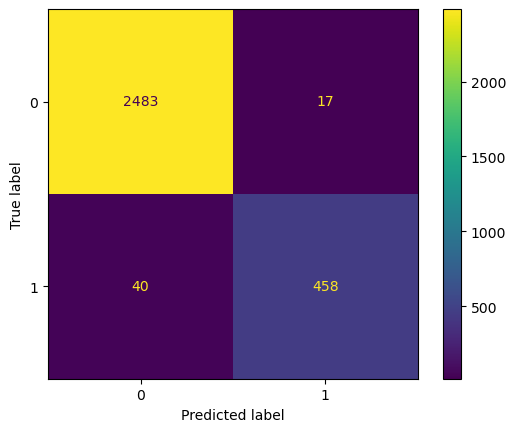

In [78]:
# Generating array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='');

### Feature Engineering

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

Dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked.

In [81]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [82]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [84]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [85]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [86]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [87]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - Round 2

In [89]:
dt = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dt2 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [90]:
dt2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'accuracy', 'recall', 'precision'})

In [91]:
# Check best params
dt2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [92]:
dt2.best_score_

0.9586752505340426

In [93]:
# Adding results for a DecisionTree model
results = summarize_results('Decision Tree Train 2', dt2 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425
2  Decision Tree Train 2   0.856693  0.903553  0.878882  0.958523  0.958675

### Random Forest Round 2

In [95]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [96]:
#rf2.fit(X_train,y_train) #Training Set

In [97]:
#write_pickle(path, rf2, 'rf2')

In [98]:
rf2 = read_pickle(path, 'rf2')

In [99]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [100]:
rf2.best_score_

0.9648089938973397

In [101]:
results = summarize_results('Random Forest Train 2', rf2 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425
2  Decision Tree Train 2   0.856693  0.903553  0.878882  0.958523  0.958675
3  Random Forest Train 2   0.866758  0.878754  0.872407  0.957411  0.964809

The scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good. But the random forest performs better than the decision tree if using AUC as the deciding metric. 

In [103]:
# Get predictions on test data
tests = get_scores('random forest 2 test', rf2, X_test, y_test,tests_df=tests)
tests

model  precision    recall        f1  accuracy       AUC
0  random forest 1 test   0.964211  0.919679  0.941418  0.980987  0.956439
1  random forest 2 test   0.870406  0.903614  0.886700  0.961641  0.938407

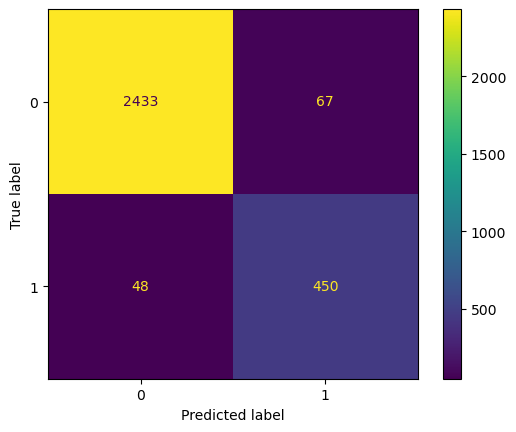

In [104]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

### Decision tree splits

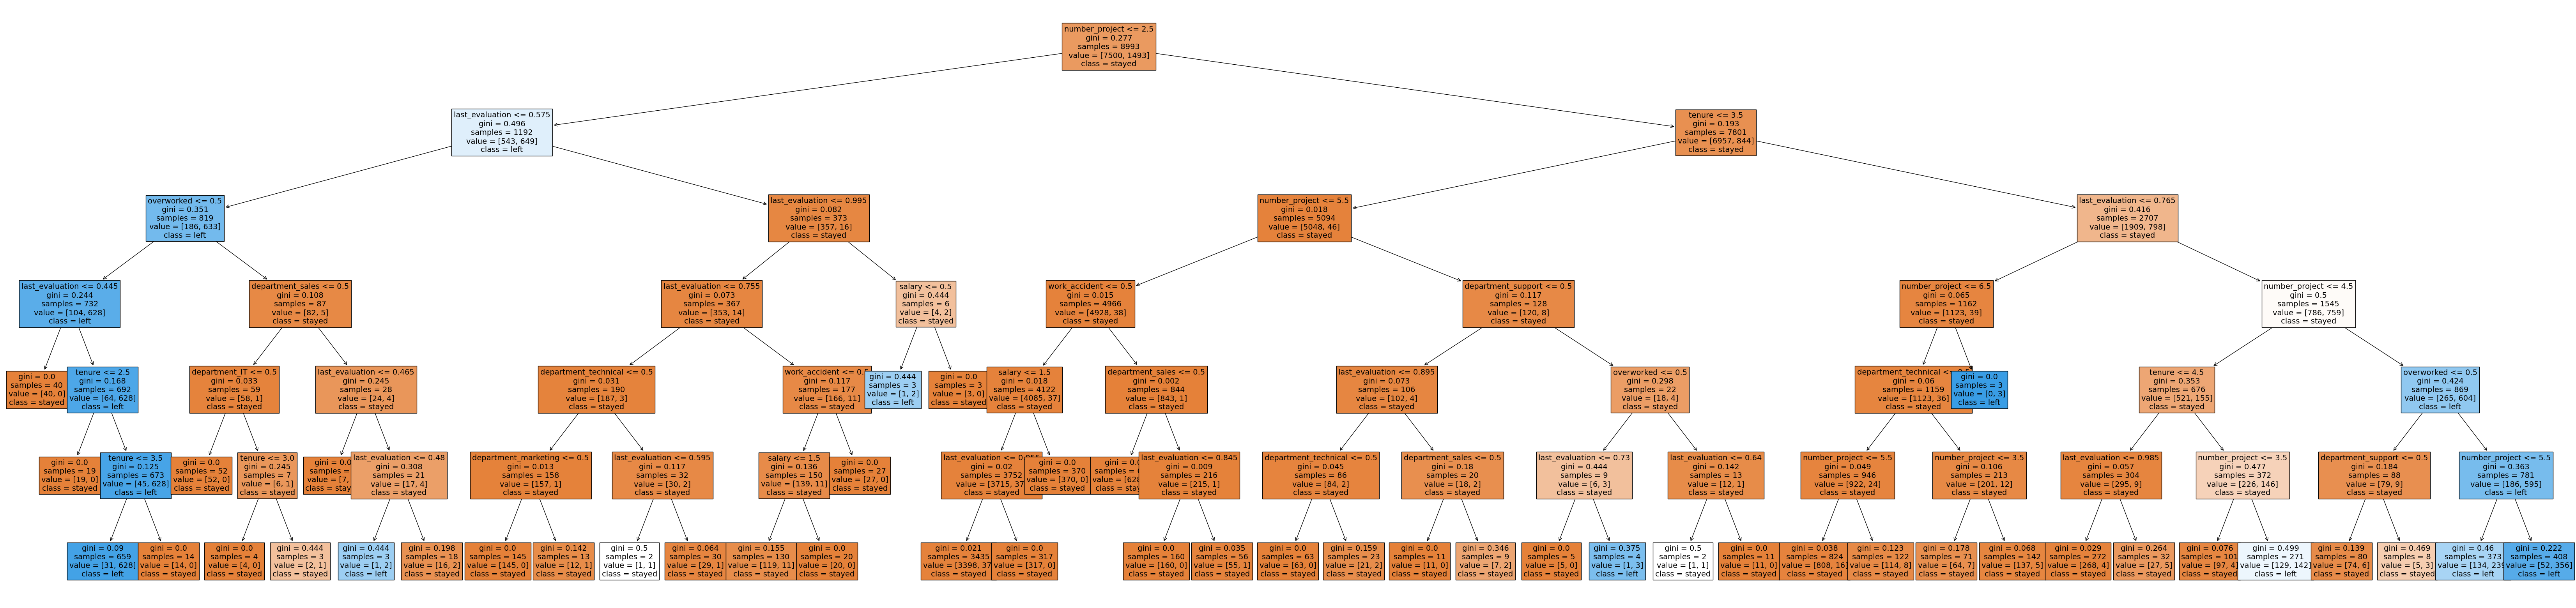

In [107]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(dt2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [109]:
#dt2_importances = pd.DataFrame(dt2.best_estimator_.feature_importances_, columns=X.columns)
dt2_importances = pd.DataFrame(dt2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt2_importances = dt2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dt2_importances = dt2_importances[dt2_importances['gini_importance'] != 0]
dt2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

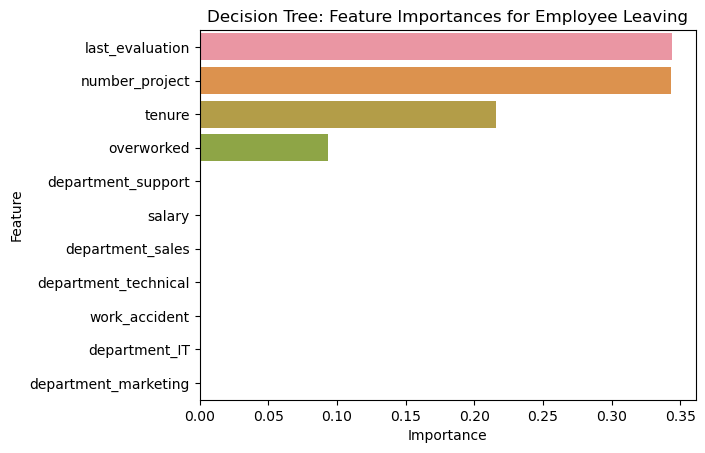

In [110]:
sns.barplot(data=dt2_importances, x="gini_importance", y=dt2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

In [112]:
from sklearn.inspection import permutation_importance

# Assuming dt2.best_estimator_ is your trained model
result = permutation_importance(dt2.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance scores
perm_importances = pd.DataFrame(result.importances_mean, columns=['permutation_importance'], index=X.columns)

# Sort the features by their importance
perm_importances = perm_importances.sort_values(by='permutation_importance', ascending=False)

# Filter out features with zero importance
perm_importances = perm_importances[perm_importances['permutation_importance'] != 0]

perm_importances

permutation_importance
number_project                1.020347e-01
tenure                        9.749833e-02
last_evaluation               9.242829e-02
overworked                    6.210807e-02
department_support            1.667779e-04
salary                        1.334223e-04
department_sales             -2.220446e-17

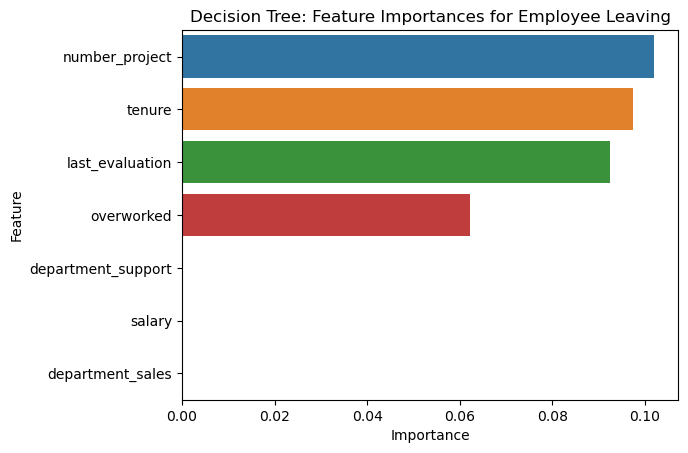

In [113]:
sns.barplot(data=perm_importances, x="permutation_importance", y=perm_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Random forest feature importance

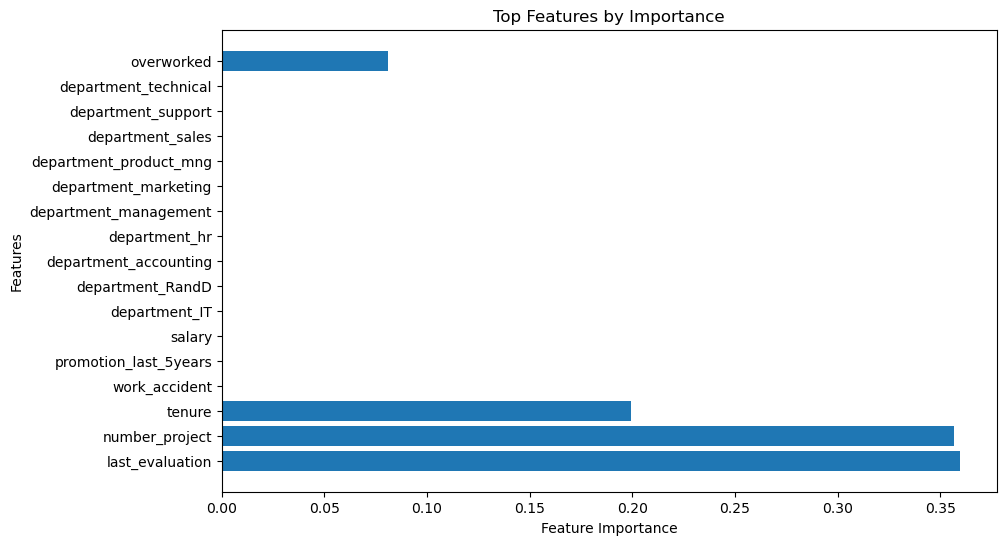

In [115]:
feature_names = X.columns

# Extract feature importances from the best estimator
feat_impt = rf2.best_estimator_.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feat_impt)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Features by Importance')
plt.show()

# Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 95.8%, precision of 85.6%, recall of 90.4%, f1-score of 87.8%, and accuracy of 95.8%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

# Next Step

It may be justified to still have some concern about data leakage. To check how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

In [119]:
y=df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [120]:
X=df_enc.drop(['left','last_evaluation'],axis=1)
X.head()

satisfaction_level  number_project  average_monthly_hours  tenure  \
0                0.38               2                    157       3   
1                0.80               5                    262       6   
2                0.11               7                    272       4   
3                0.72               5                    223       5   
4                0.37               2                    159       3   

   work_accident  promotion_last_5years  salary  department_IT  \
0              0                      0       0          False   
1              0                      0       1          False   
2              0                      0       1          False   
3              0                      0       0          False   
4              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [121]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,stratify=y,test_size=0.25,random_state=0)

# LOGISTIC REGRESSION MODEL 2

In [123]:
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train1,y_train1)

LogisticRegression(max_iter=500, random_state=42)

In [124]:
y_pred1=log_clf.predict(X_test1)

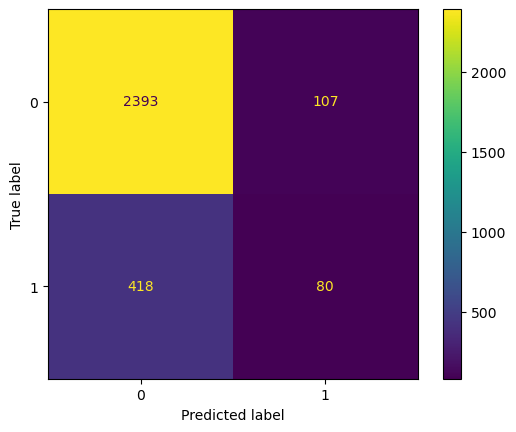

In [125]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test1, y_pred1, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [126]:
target_names=['predicted would not leave','predicted would leave']
print(classification_report(y_test1,y_pred1,target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.85      0.96      0.90      2500
    predicted would leave       0.43      0.16      0.23       498

                 accuracy                           0.82      2998
                macro avg       0.64      0.56      0.57      2998
             weighted avg       0.78      0.82      0.79      2998



The classification report above shows that the logistic regression model achieved a precision of 78%, recall of 82%, f1-score of 79% (all weighted averages), and accuracy of 82%.
Clearly 'last_evaluation' as a feature does affect the metrics of logistic regression.

# TREE-BASED MODEL ANALYSIS PART 2

### Decision Tree Model 3

In [130]:
dt = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dt3 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [131]:
dt3.fit(X_train1,y_train1)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'accuracy', 'recall', 'precision'})

In [132]:
# Check best parameters
dt3.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [133]:
dt3.best_score_

0.9712674542300468

In [134]:
# Adding results for a DecisionTree model
results = summarize_results('Decision Tree Train 3', dt3 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425
2  Decision Tree Train 2   0.856693  0.903553  0.878882  0.958523  0.958675
3  Random Forest Train 2   0.866758  0.878754  0.872407  0.957411  0.964809
4  Decision Tree Train 3   0.947514  0.916949  0.931943  0.977760  0.971267

The metrics for Decision Tree 3 are different and better than the other 2

### Random Forest Round 3

In [137]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [138]:
#rf3.fit(X_train1,y_train1)

In [139]:
#write_pickle(path, rf3, 'rf3')

In [140]:
rf3 = read_pickle(path, 'rf3')

In [141]:
rf3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [142]:
rf3.best_score_

0.9802229535538319

In [143]:
results = summarize_results('Random Forest Train 3', rf3 , metric='roc_auc', results_df=results)
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425
2  Decision Tree Train 2   0.856693  0.903553  0.878882  0.958523  0.958675
3  Random Forest Train 2   0.866758  0.878754  0.872407  0.957411  0.964809
4  Decision Tree Train 3   0.947514  0.916949  0.931943  0.977760  0.971267
5  Random Forest Train 3   0.946827  0.917619  0.931962  0.977760  0.980223

In [144]:
# Get predictions on test data
tests = get_scores('random forest 3 test', rf3, X_test1, y_test1,tests_df=tests)
tests

model  precision    recall        f1  accuracy       AUC
0  random forest 1 test   0.964211  0.919679  0.941418  0.980987  0.956439
1  random forest 2 test   0.870406  0.903614  0.886700  0.961641  0.938407
2  random forest 3 test   0.956250  0.921687  0.938650  0.979987  0.956643

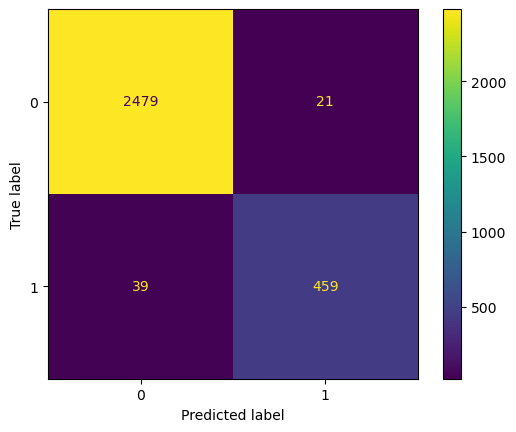

In [145]:
# Generate array of values for confusion matrix
preds = rf3.best_estimator_.predict(X_test1)
cm = confusion_matrix(y_test1, preds, labels=rf3.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf3.classes_)
disp.plot(values_format='');

# Summary of model results

**Logistic Regression**

The logistic regression model achieved a precision of 78%, recall of 82%, f1-score of 79% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

After removing 'last_evaluation', the decision tree model achieved AUC of 97.1%, precision of 94.8%, recall of 91.7%, f1-score of 93.2%, and accuracy of 97.8%, on the test set. The random forest marginally outperformed the decision tree model. 

In [147]:
results

model  precision    recall        F1  accuracy       auc
0  Decision Tree Train 1   0.914552  0.916949  0.915707  0.971978  0.969819
1  Random Forest Train 1   0.950023  0.915614  0.932467  0.977983  0.980425
2  Decision Tree Train 2   0.856693  0.903553  0.878882  0.958523  0.958675
3  Random Forest Train 2   0.866758  0.878754  0.872407  0.957411  0.964809
4  Decision Tree Train 3   0.947514  0.916949  0.931943  0.977760  0.971267
5  Random Forest Train 3   0.946827  0.917619  0.931962  0.977760  0.980223

In [148]:
tests

model  precision    recall        f1  accuracy       AUC
0  random forest 1 test   0.964211  0.919679  0.941418  0.980987  0.956439
1  random forest 2 test   0.870406  0.903614  0.886700  0.961641  0.938407
2  random forest 3 test   0.956250  0.921687  0.938650  0.979987  0.956643